## Connecting to Drive

In [ ]:
#Connecting to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from tqdm import tqdm
import os

## Merging the CSV files

In [ ]:
DATASET_DIRECTORY = "/content/drive/Shareddrives/DATA 245 - Machine Learning/Dataset/"

df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Read each CSV file into DataFrame and create a list of dataframes
for file in tqdm(df_sets):
    df_list = [pd.read_csv(DATASET_DIRECTORY + file)]

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)
print(big_df.info())

100%|██████████| 169/169 [08:20<00:00,  2.96s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234745 entries, 0 to 234744
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    234745 non-null  float64
 1   Header_Length    234745 non-null  float64
 2   Protocol Type    234745 non-null  float64
 3   Duration         234745 non-null  float64
 4   Rate             234745 non-null  float64
 5   Srate            234745 non-null  float64
 6   Drate            234745 non-null  float64
 7   fin_flag_number  234745 non-null  float64
 8   syn_flag_number  234745 non-null  float64
 9   rst_flag_number  234745 non-null  float64
 10  psh_flag_number  234745 non-null  float64
 11  ack_flag_number  234745 non-null  float64
 12  ece_flag_number  234745 non-null  float64
 13  cwr_flag_number  234745 non-null  float64
 14  ack_count        234745 non-null  float64
 15  syn_count        234745 non-null  float64
 16  fin_count        234745 non-null  floa

In [ ]:
big_df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

## Dataset Analysis

In [ ]:
big_df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,110.797744,110.797744,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307619e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
1,0.006453,182.88,16.67,63.60,30.905833,30.905833,0.0,0.0,0.0,0.0,...,3.072377,162.87,8.300739e+07,9.5,18.010237,4.370333,209.623265,0.05,141.55,DoS-UDP_Flood
2,31.739927,7382.93,3.23,80.15,8.923224,8.923224,0.0,0.0,0.0,0.0,...,532.284695,637.09,8.328373e+07,9.5,35.140754,752.738781,306225.702126,0.94,141.55,DDoS-ICMP_Fragmentation
3,0.000000,54.00,6.00,64.00,1.697796,1.697796,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307650e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
4,0.000000,54.00,6.00,64.00,1.471092,1.471092,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334428e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [ ]:
big_df.shape

(234745, 47)

In [ ]:
big_df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,234745.000000,2.347450e+05,234745.000000,234745.000000,2.347450e+05,2.347450e+05,234745.000000,234745.000000,234745.000000,234745.000000,...,234745.000000,234745.000000,234745.000000,2.347450e+05,234745.000000,234745.000000,234745.000000,2.347450e+05,234745.000000,234745.000000
mean,6.719492,7.791274e+04,9.078847,66.346131,9.149516e+03,9.149516e+03,0.000006,0.086673,0.205708,0.090767,...,125.160435,33.102288,125.404624,8.316921e+07,9.497754,13.141551,46.782769,3.025101e+04,0.096378,141.493056
std,326.178704,4.692158e+05,8.972802,14.056953,1.014439e+05,1.014439e+05,0.002092,0.281356,0.404219,0.287277,...,241.669444,158.536571,242.917044,1.697098e+07,0.815281,8.655077,224.242330,2.976294e+05,0.232430,20.972226
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.115525e+00,2.115525e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.580815e+01,1.580815e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312452e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105766,3.169200e+02,14.760000,64.000000,1.176183e+02,1.176183e+02,0.000000,0.000000,0.000000,0.000000,...,54.052793,0.384222,54.060000,8.334389e+07,9.500000,10.396749,0.515670,1.443935e+00,0.080000,141.550000
max,59472.877903,9.670762e+06,47.000000,255.000000,6.291456e+06,6.291456e+06,0.998848,1.000000,1.000000,1.000000,...,6938.313254,5926.197478,5134.000000,1.676394e+08,15.000000,114.503114,8380.908846,3.950831e+07,1.000000,244.600000


**Finding Nulls**

In [ ]:
big_df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

**Duplicates**

In [ ]:
duplicate_count = big_df.duplicated().sum() #Checking for duplicates

print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


## Target Feature

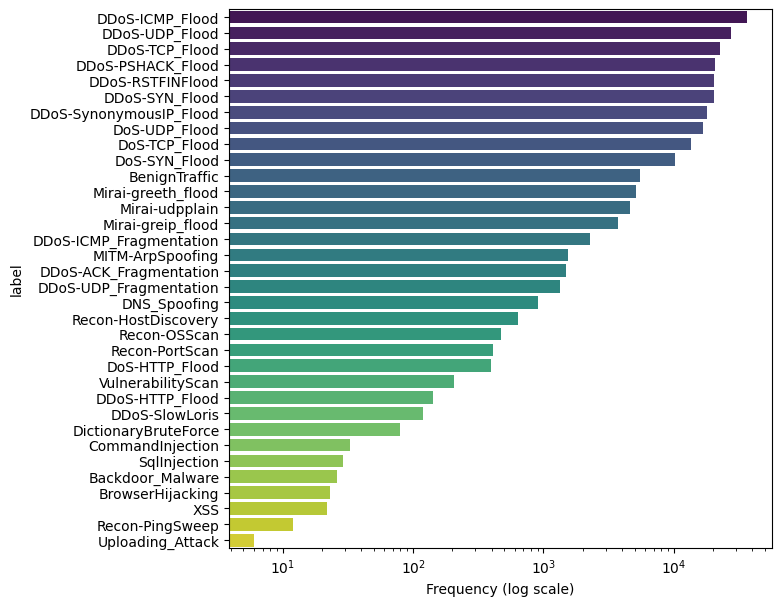

In [ ]:
label_counts = big_df['label'].value_counts()

# Convert value counts to DataFrame for easier plotting
label_counts_df = pd.DataFrame({'Label': label_counts.index, 'Frequency': label_counts.values})

# Plot horizontal bar chart
plt.figure(figsize=(7, 7))
bar_chart = sns.barplot(x='Frequency', y='Label', data=label_counts_df, palette='viridis')
bar_chart.set(xlabel='Frequency (log scale)', ylabel='label')
plt.xscale('log')
plt.show()

In [ ]:
big_df['label'].value_counts()

DDoS-ICMP_Flood            36394
DDoS-UDP_Flood             27326
DDoS-TCP_Flood             22423
DDoS-PSHACK_Flood          20508
DDoS-RSTFINFlood           20365
DDoS-SYN_Flood             20343
DDoS-SynonymousIP_Flood    17807
DoS-UDP_Flood              16654
DoS-TCP_Flood              13641
DoS-SYN_Flood              10163
BenignTraffic               5481
Mirai-greeth_flood          5146
Mirai-udpplain              4622
Mirai-greip_flood           3705
DDoS-ICMP_Fragmentation     2269
MITM-ArpSpoofing            1534
DDoS-ACK_Fragmentation      1501
DDoS-UDP_Fragmentation      1342
DNS_Spoofing                 901
Recon-HostDiscovery          641
Recon-OSScan                 476
Recon-PortScan               408
DoS-HTTP_Flood               396
VulnerabilityScan            207
DDoS-HTTP_Flood              143
DDoS-SlowLoris               119
DictionaryBruteForce          79
CommandInjection              33
SqlInjection                  29
Backdoor_Malware              26
BrowserHij

## Map target labels to specific attack types

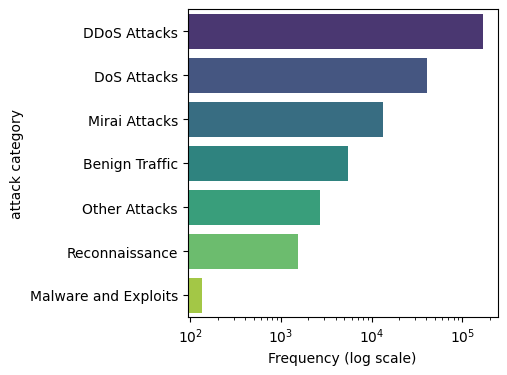

In [ ]:
# Define the mapping of attack types to categories
attack_to_category = {
    "DDoS-ICMP_Flood": "DDoS Attacks",
    "DDoS-UDP_Flood": "DDoS Attacks",
    "DDoS-TCP_Flood": "DDoS Attacks",
    "DDoS-PSHACK_Flood": "DDoS Attacks",
    "DDoS-RSTFINFlood": "DDoS Attacks",
    "DDoS-SYN_Flood": "DDoS Attacks",
    "DDoS-SynonymousIP_Flood": "DDoS Attacks",
    "DDoS-ICMP_Fragmentation": "DDoS Attacks",
    "DDoS-ACK_Fragmentation": "DDoS Attacks",
    "DDoS-UDP_Fragmentation": "DDoS Attacks",
    "DDoS-HTTP_Flood": "DDoS Attacks",
    "DDoS-SlowLoris": "DDoS Attacks",
    "DoS-UDP_Flood": "DoS Attacks",
    "DoS-TCP_Flood": "DoS Attacks",
    "DoS-SYN_Flood": "DoS Attacks",
    "DoS-HTTP_Flood": "DoS Attacks",
    "Mirai-greeth_flood": "Mirai Attacks",
    "Mirai-udpplain": "Mirai Attacks",
    "Mirai-greip_flood": "Mirai Attacks",
    "Recon-HostDiscovery": "Reconnaissance",
    "Recon-OSScan": "Reconnaissance",
    "Recon-PortScan": "Reconnaissance",
    "Recon-PingSweep": "Reconnaissance",
    "Backdoor_Malware": "Malware and Exploits",
    "CommandInjection": "Malware and Exploits",
    "SqlInjection": "Malware and Exploits",
    "BrowserHijacking": "Malware and Exploits",
    "XSS": "Malware and Exploits",
    "MITM-ArpSpoofing": "Other Attacks",
    "DNS_Spoofing": "Other Attacks",
    "VulnerabilityScan": "Other Attacks",
    "DictionaryBruteForce": "Other Attacks",
    "BenignTraffic": "Benign Traffic"
    }

big_df['category'] = big_df['label'].map(attack_to_category)

# Add a new column "Category" to big_df
label_counts = big_df['category'].value_counts()

# Convert value counts to DataFrame for easier plotting
label_counts_df = pd.DataFrame({'Label': label_counts.index, 'Frequency': label_counts.values})

# Plot horizontal bar chart
plt.figure(figsize=(4, 4))
bar_chart = sns.barplot(x='Frequency', y='Label', data=label_counts_df, palette='viridis')
bar_chart.set(xlabel='Frequency (log scale)', ylabel='attack category')
plt.xscale('log')
plt.show()

In [ ]:
attack_type_mapping = {
    'DDoS Attacks': 0,
    'DoS Attacks': 1,
    'Mirai Attacks': 2,
    'Benign Traffic': 3,
    'Other Attacks': 4,
    'Reconnaissance': 5,
    'Malware and Exploits': 6
}

# Use the map() function to replace the attack types with numbers
big_df['target'] = big_df['category'].map(attack_type_mapping)

# Print the resulting DataFrame
big_df['target'].value_counts()


0.0    170540
1.0     40854
2.0     13473
3.0      5481
4.0      2721
5.0      1537
6.0       133
Name: target, dtype: int64

# EDA

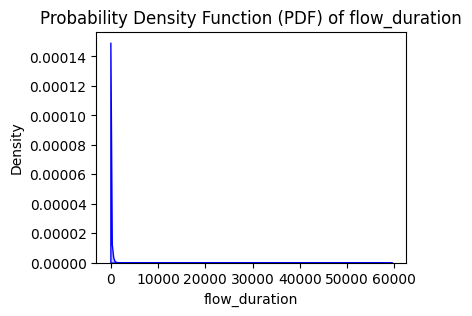

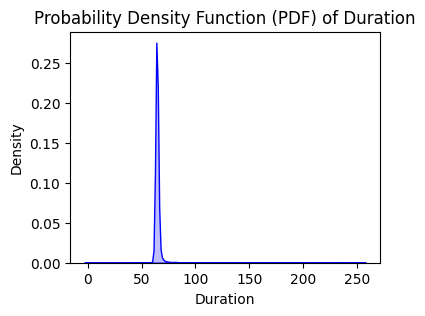

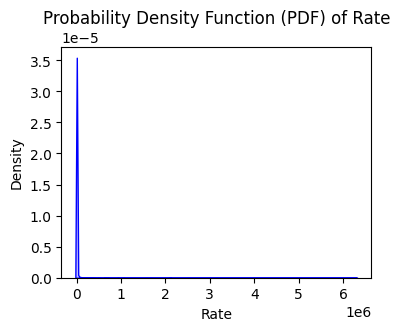

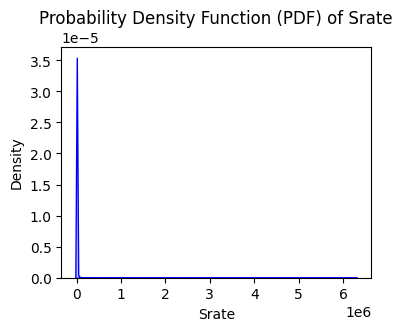

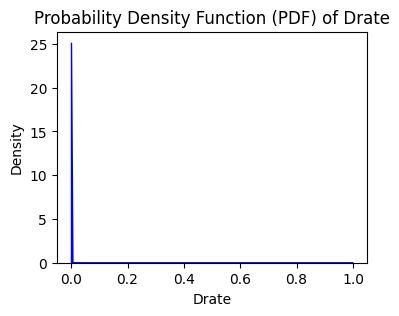

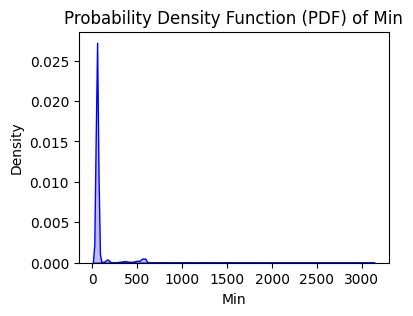

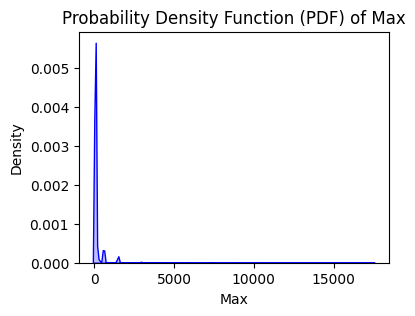

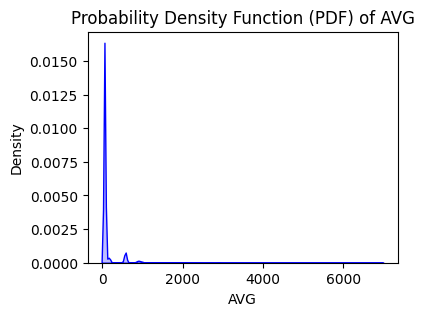

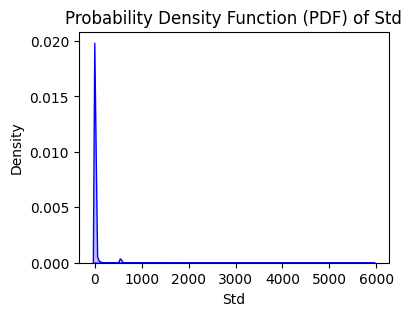

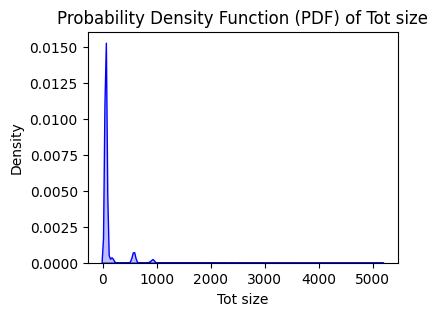

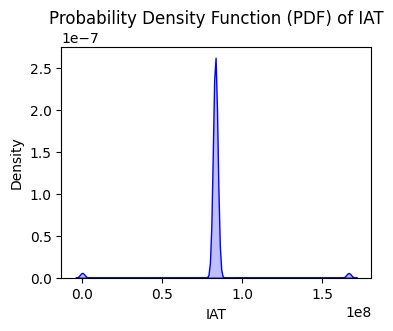

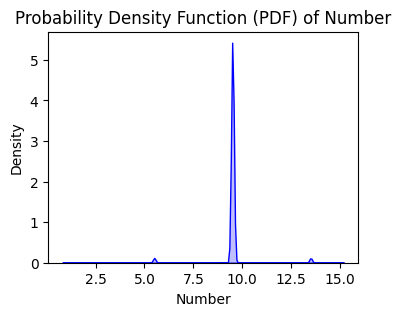

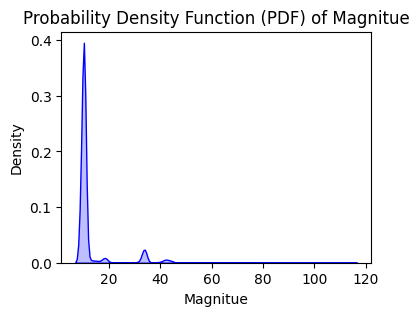

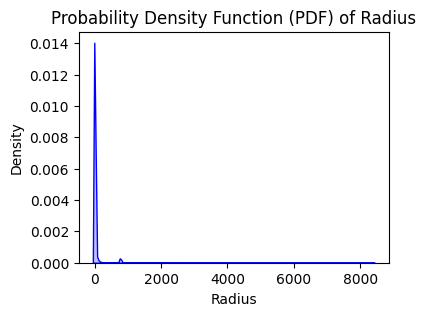

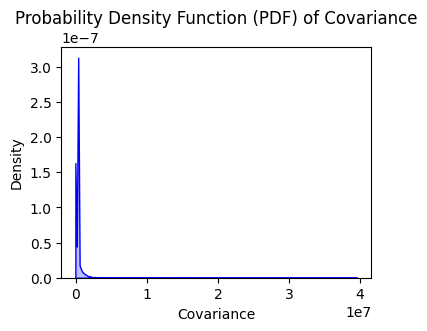

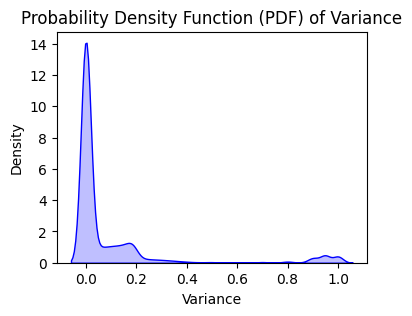

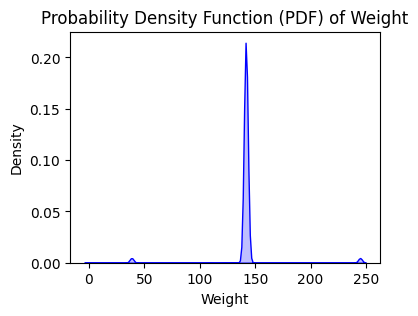

In [ ]:
numerical_features = ['flow_duration', 'Duration', 'Rate', 'Srate', 'Drate', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(big_df[feature], fill=True, color='b')
    plt.title(f'Probability Density Function (PDF) of {feature}')
    plt.show()


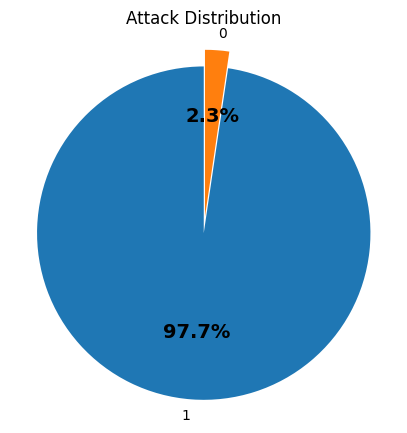

In [ ]:
big_df['attack'] = big_df['target'].apply(lambda x: 0 if x==3 else 1)

attack_counts = big_df['attack'].value_counts()
plt.figure(figsize=(5,5))
sizes = attack_counts.values
labels = attack_counts.index
explode = (0.1, 0)  # Explode the 1st slice (with 'attack' value 1)
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Set font properties for the percentage values
for autotext in autotexts:
    autotext.set_fontsize(14)  # Set font size
    autotext.set_fontweight('bold')  # Set font weight to bold

# Add a title
plt.title('Attack Distribution')

# Show the 3D pie chart
plt.show()

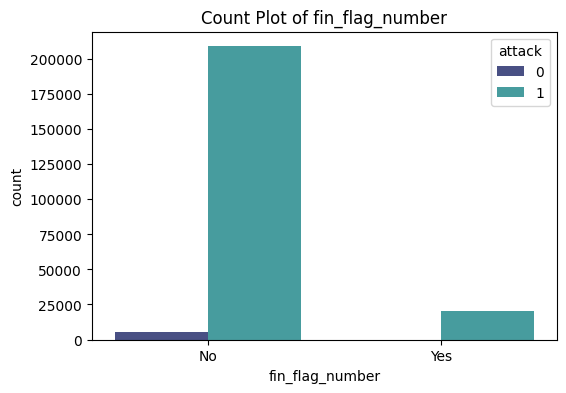

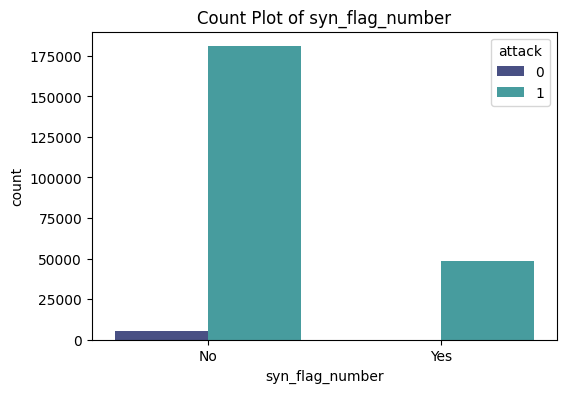

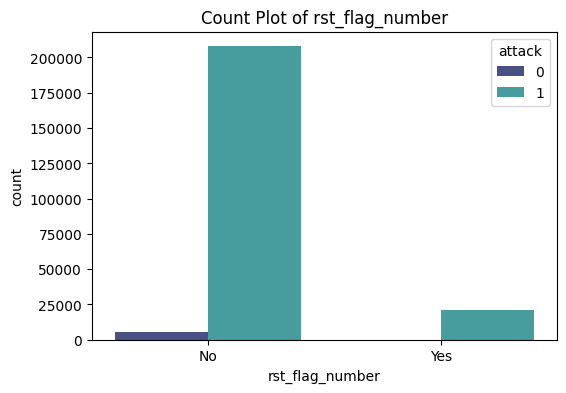

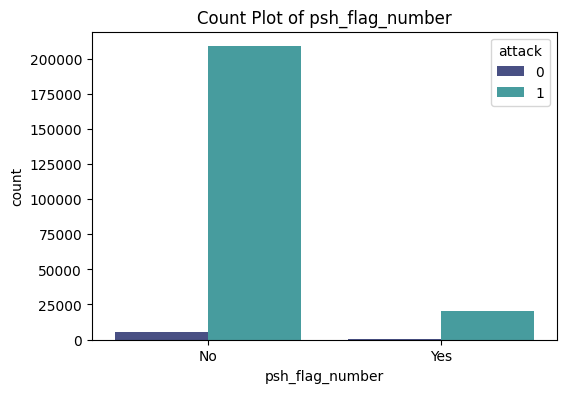

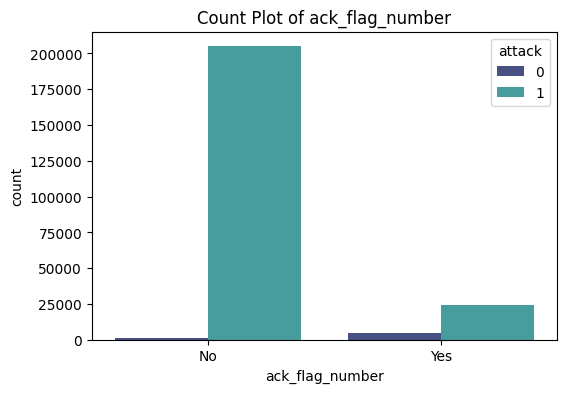

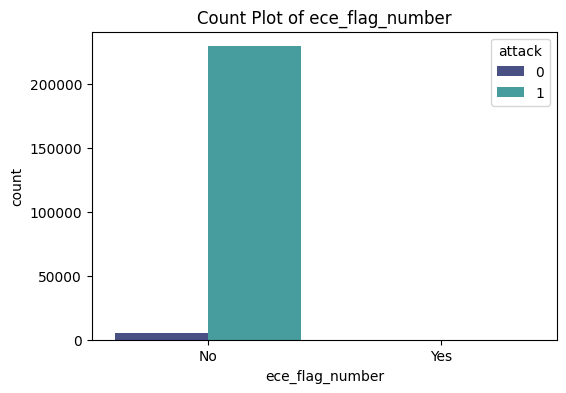

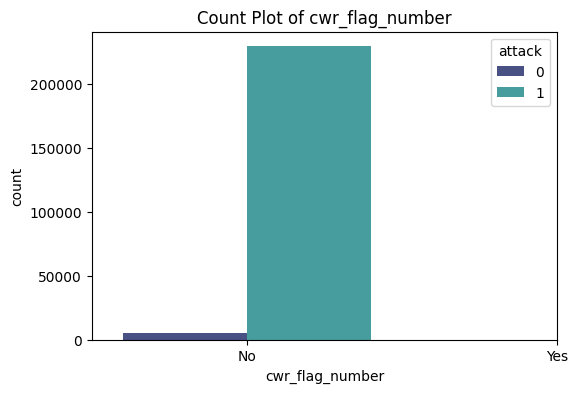

In [ ]:
binary_features=['fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number']
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=big_df, x=feature, hue='attack', palette='mako')
    plt.title(f'Count Plot of {feature}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()


In [ ]:
attack_type_mapping = {
    'DDoS Attacks': 0,
    'DoS Attacks': 1,
    'Mirai Attacks': 2,
    'Benign Traffic': 3,
    'Other Attacks': 4,
    'Reconnaissance': 5,
    'Malware and Exploits': 6
}

idx2str = {v:k for k,v in attack_type_mapping.items()}
idx2str

{0: 'DDoS Attacks',
 1: 'DoS Attacks',
 2: 'Mirai Attacks',
 3: 'Benign Traffic',
 4: 'Other Attacks',
 5: 'Reconnaissance',
 6: 'Malware and Exploits'}

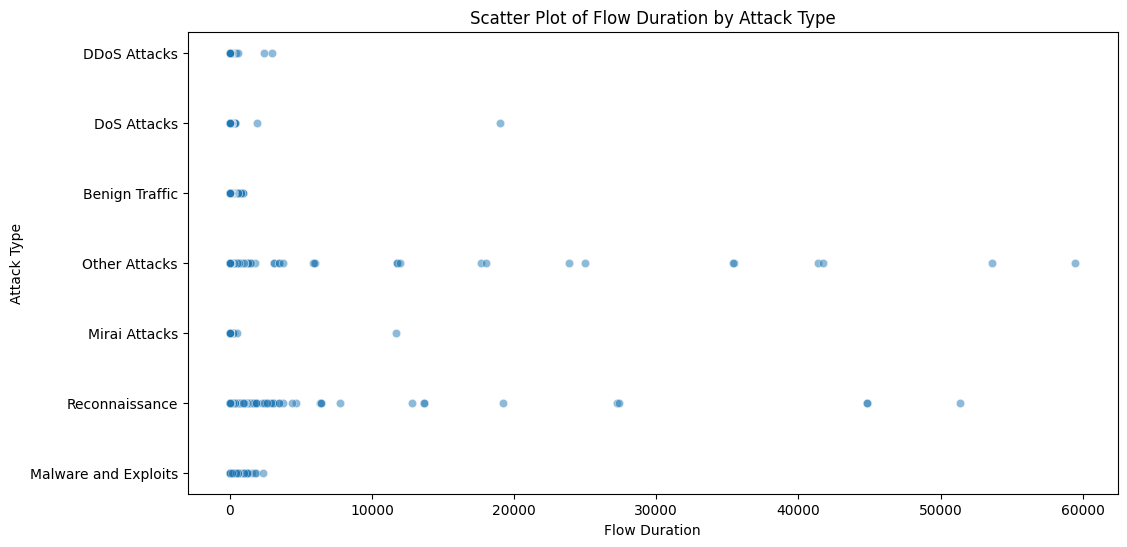

In [ ]:
# scatter plot for 'flow_duration' by 'label'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='flow_duration', y='category', data=big_df, alpha=0.5)
plt.title('Scatter Plot of Flow Duration by Attack Type')
plt.xlabel('Flow Duration')
plt.ylabel('Attack Type')
plt.show()

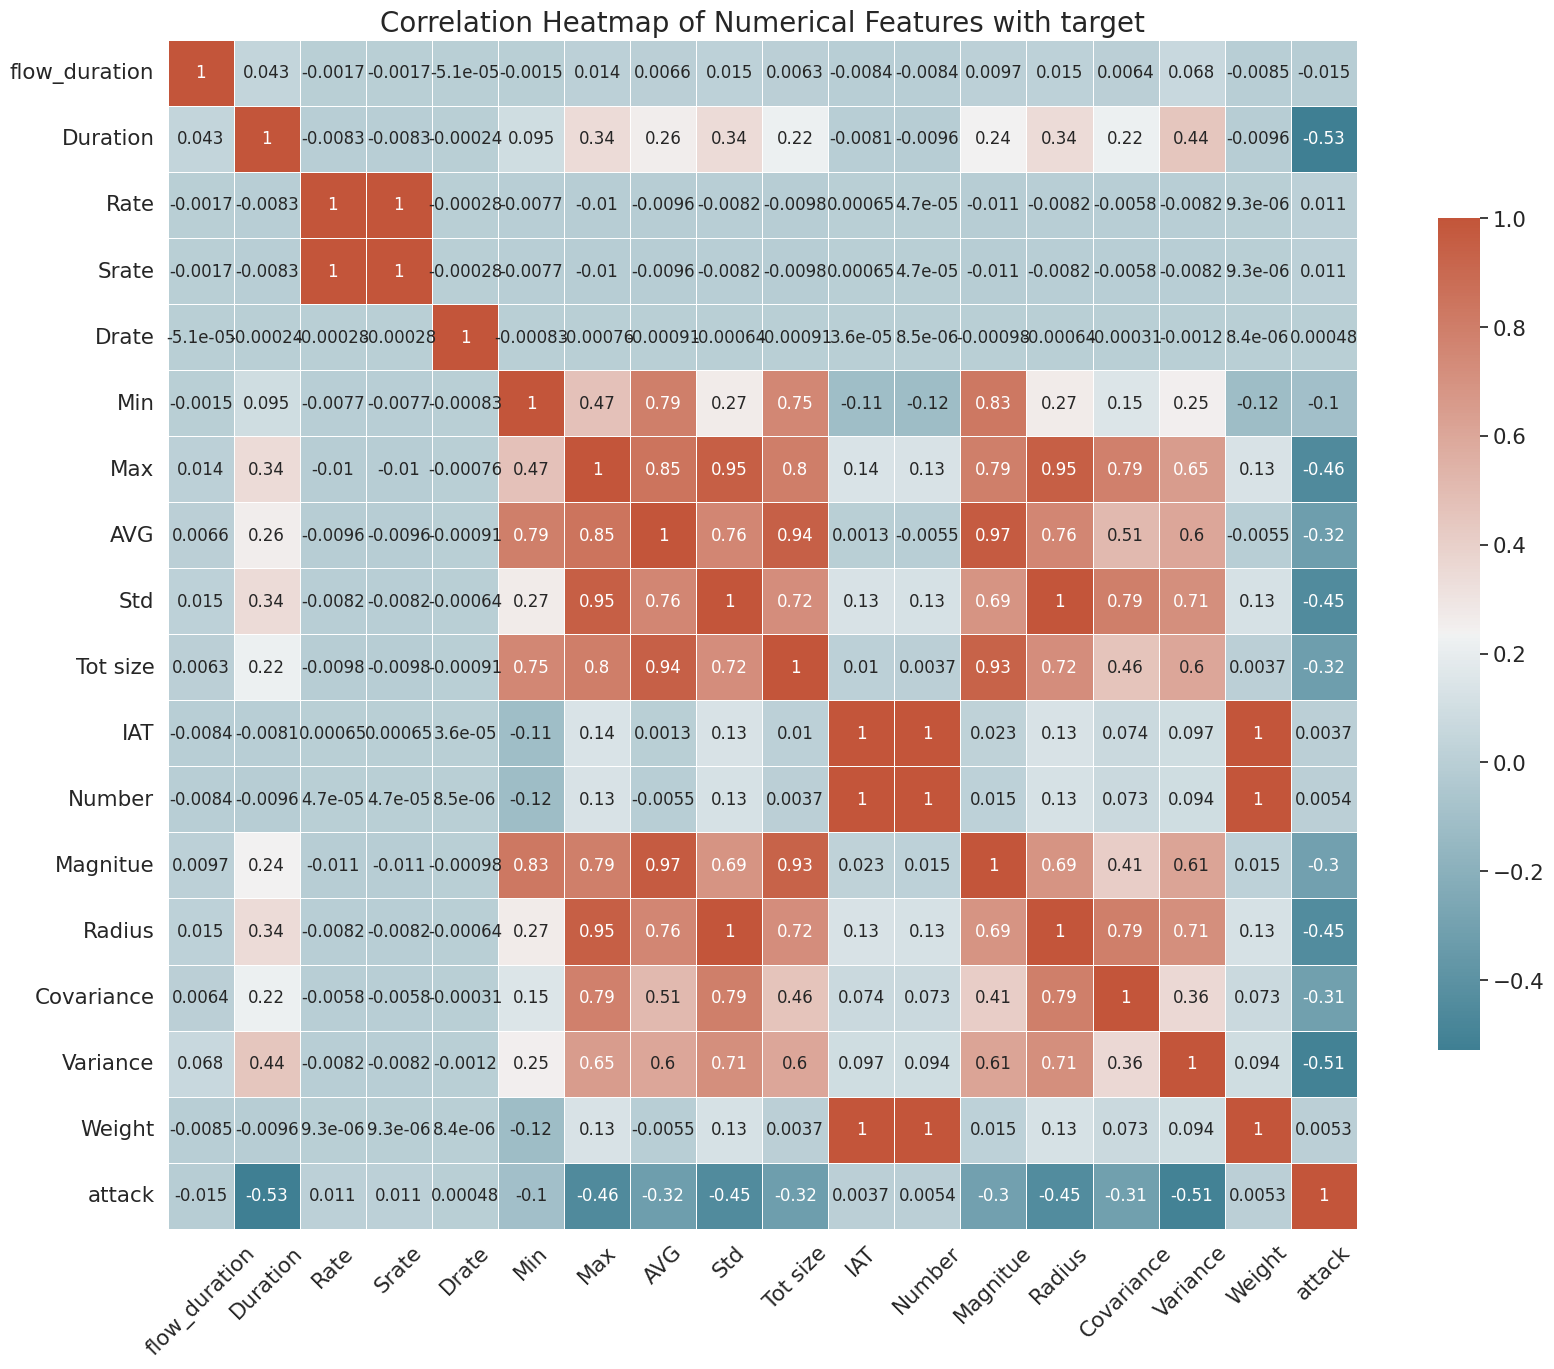

In [ ]:
#  relevant columns for the correlation heatmap
selected_columns = ['flow_duration', 'Duration', 'Rate', 'Srate', 'Drate', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'attack']

#Calculate the correlation matrix
corr_matrix = big_df[selected_columns].corr()

sns.set(font_scale=1.4)


plt.figure(figsize=(18, 14))

#  the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, annot_kws={"size": 12}, cbar_kws={"shrink": 0.7}, square=True)
plt.title('Correlation Heatmap of Numerical Features with target', fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Show the heatmap
plt.tight_layout()
plt.show()


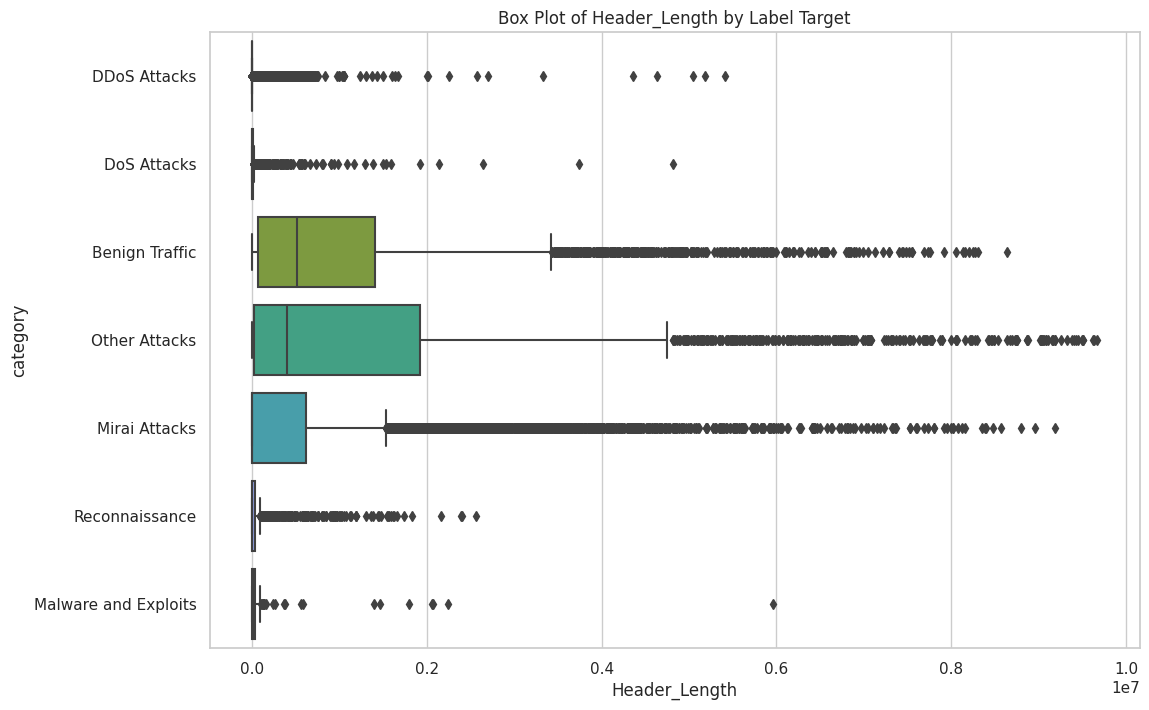

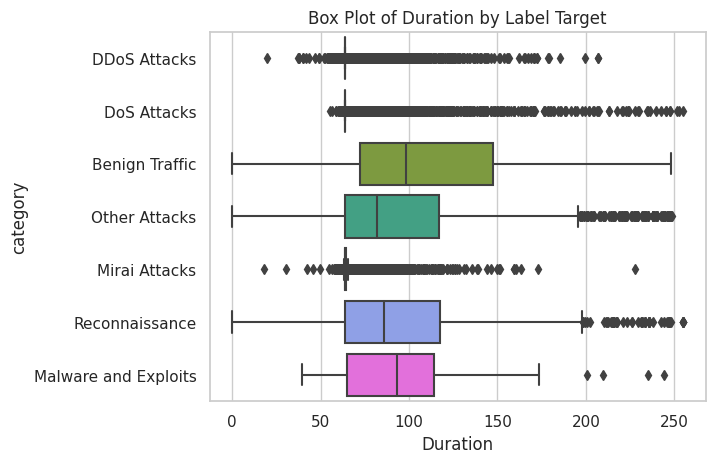

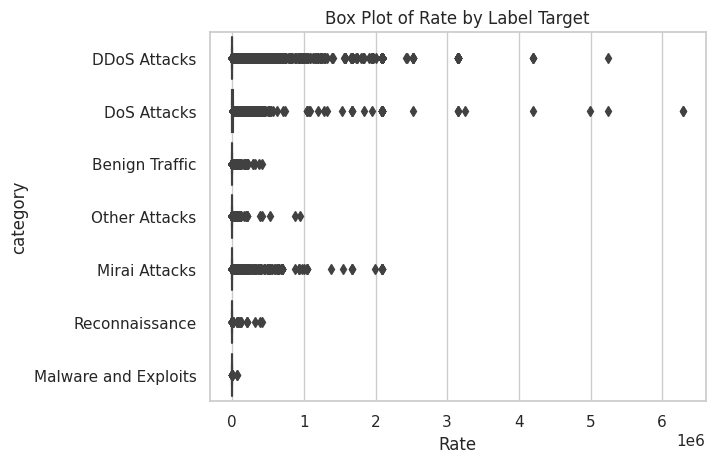

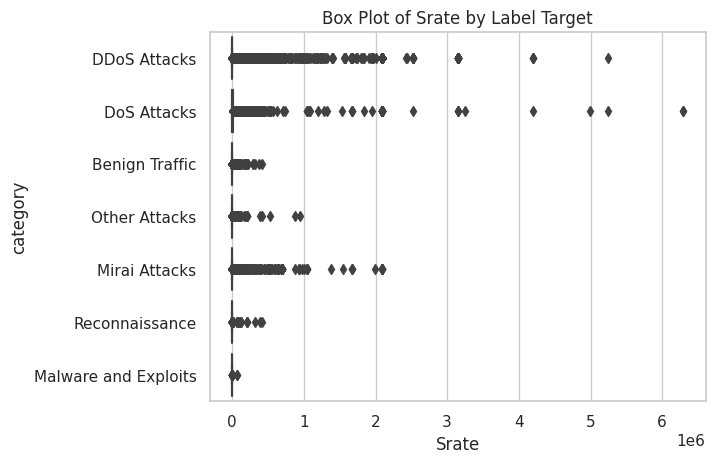

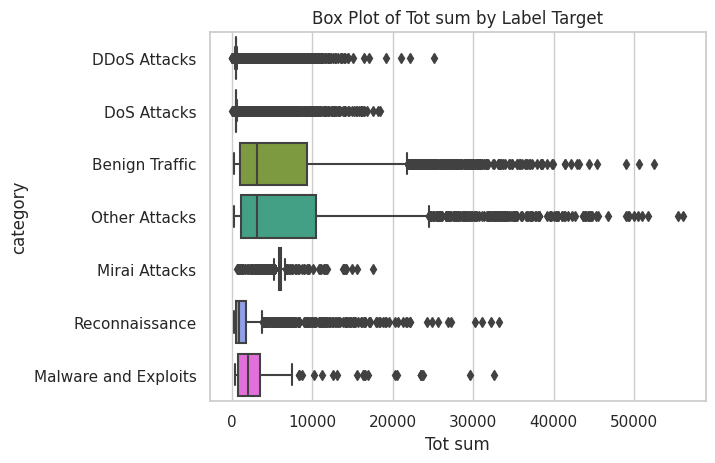

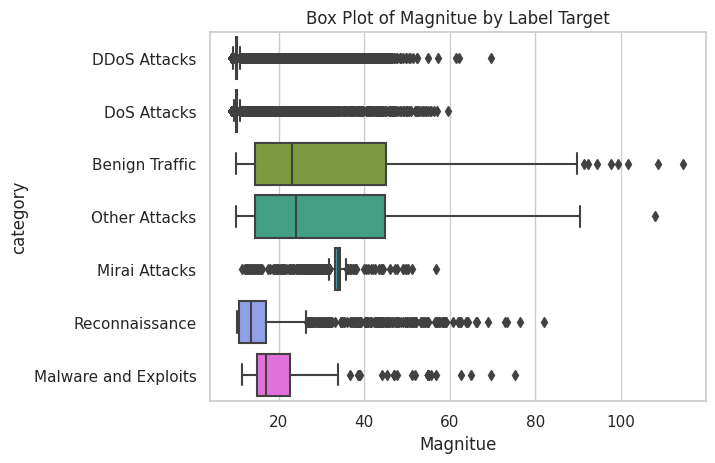

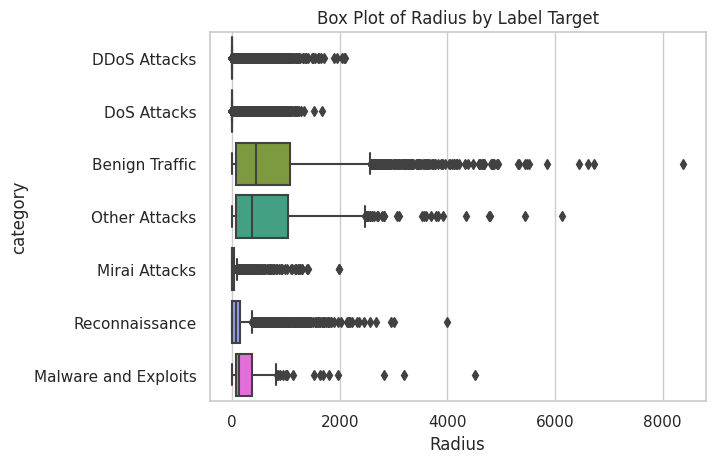

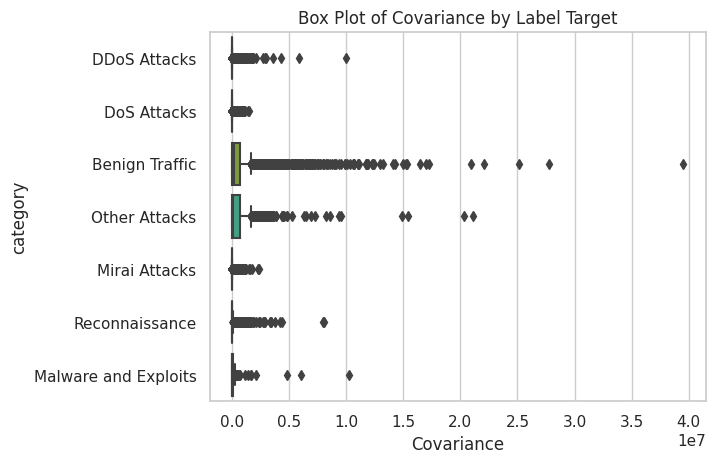

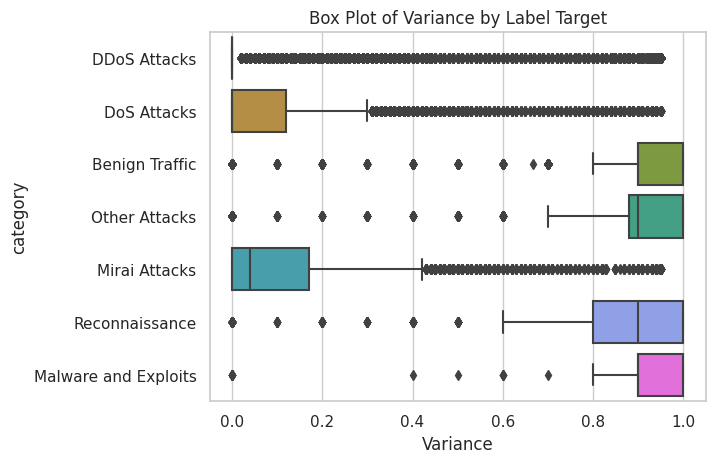

In [ ]:
# features for box plots
selected_features = ['Header_Length', 'Duration', 'Rate', 'Srate', 'Tot sum', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

#box plots for selected features
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for feature in selected_features[:-1]:  # Exclude 'label'
    sns.boxplot(x=feature, y='category', data=big_df, palette='husl')
    plt.title(f'Box Plot of {feature} by Label Target')
    plt.show()

# Outlier

We are copying to all data from big_df dataframe to big_df1 dataframe as we will performing cleaning like outliers and do not want data to be lost


In [ ]:
big_df1 = big_df.copy()
# List of numerical columns
numerical_columns = [
    'flow_duration', 'Header_Length', 'Duration', 'Rate',
    'Srate', 'Drate', 'Tot sum', 'Min', 'Max', 'AVG', 'Std',
    'Tot size', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

# Define a function to detect and handle outliers using Z-score
def z_score_outlier_detection(data, threshold=4):
    z_scores = np.abs((data - data.mean()) / data.std())
    is_outlier = z_scores > threshold
    #print("z_scores",z_scores,"z_scores")
    return data[~is_outlier]

for column in numerical_columns:
    big_df1[column] = z_score_outlier_detection(big_df1[column])

big_df1.isnull().sum()

flow_duration        80
Header_Length      2918
Protocol Type         0
Duration           3185
Rate                975
Srate               975
Drate                15
fin_flag_number       0
syn_flag_number       0
rst_flag_number       0
psh_flag_number       0
ack_flag_number       0
ece_flag_number       0
cwr_flag_number       0
ack_count             0
syn_count             0
fin_count             0
urg_count             0
rst_count             0
HTTP                  0
HTTPS                 0
DNS                   0
Telnet                0
SMTP                  0
SSH                   0
IRC                   0
TCP                   0
UDP                   0
DHCP                  0
ARP                   0
ICMP                  0
IPv                   0
LLC                   0
Tot sum            1842
Min                 782
Max                2671
AVG                2095
Std                2689
Tot size           2121
IAT                   0
Number             9694
Magnitue        

In [ ]:
# Fill null values with median
big_df1 = big_df1.fillna(big_df1.mean())

<ipython-input-27-e9b8aa1a65bb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  big_df1 = big_df1.fillna(big_df1.mean())


In [ ]:
big_df2 = big_df1.copy()
big_df2 = big_df2.drop(['category', 'label', 'attack'], axis=1)

## Feature Engineering

In [ ]:
big_df2 = big_df2[big_df2['target'].isin([0, 1, 2, 3, 4, 5, 6])]

In [ ]:
big_df2.target.value_counts()

0.0    170540
1.0     40854
2.0     13473
3.0      5481
4.0      2721
5.0      1537
6.0       133
Name: target, dtype: int64

In [ ]:
df = big_df2.copy()
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def apply_regularization(X_train, X_test, y_train, y_test, regularization_type='l2', C=1.0):
    model = LogisticRegression(penalty=regularization_type, C=C, solver='liblinear', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def apply_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    # Create a Random Forest model
    model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model_rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    return model_rf, accuracy_rf

def apply_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    # Create a k-Nearest Neighbors model
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_knn = model_knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    return model_knn, accuracy_knn

def apply_decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    # Create a Decision Tree model
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_dt = model_dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)

    return model_dt, accuracy_dt

def apply_naive_bayes(X_train, X_test, y_train, y_test):
    # Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_nb = model_nb.predict(X_test)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)

    return model_nb, accuracy_nb

def apply_svm(X_train, X_test, y_train, y_test, kernel='linear', C=1.0):
    # Create a Support Vector Machine (SVM) model
    model_svm = SVC(kernel=kernel, C=C, random_state=42)
    model_svm.fit(X_train, y_train)

    # Predict and evaluate
    y_pred_svm = model_svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)

    return model_svm, accuracy_svm

In [ ]:
%%time
accuracy_l1 = apply_regularization(X_train, X_test, y_train, y_test, regularization_type='l1', C=1.0)
print("Logistic Regression with L1 regularization", accuracy_l1)

Logistic Regression with L1 regularization 0.9860060917165435
CPU times: user 50 s, sys: 288 ms, total: 50.3 s
Wall time: 50.6 s


In [ ]:
%%time
accuracy_l2 = apply_regularization(X_train, X_test, y_train, y_test, regularization_type='l2', C=1.0)
print("Logistic Regression with L2 regularization", accuracy_l2)

Logistic Regression with L2 regularization 0.7455695663287041
CPU times: user 26.6 s, sys: 109 ms, total: 26.7 s
Wall time: 26.8 s


In [ ]:
%%time
model_rf, accuracy_rf = apply_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None)
print(f"Accuracy with Random Forest: {accuracy_rf:.4f}")

Accuracy with Random Forest: 0.9967
CPU times: user 13.9 s, sys: 112 ms, total: 14 s
Wall time: 14 s


In [ ]:
%%time
model_knn, accuracy_knn = apply_knn(X_train, X_test, y_train, y_test, n_neighbors=5)
print(f"Accuracy with k-Nearest Neighbors: {accuracy_knn:.4f}")

Accuracy with k-Nearest Neighbors: 0.9895
CPU times: user 1min 54s, sys: 277 ms, total: 1min 55s
Wall time: 1min 12s


In [ ]:
%%time
model_dt, accuracy_dt = apply_decision_tree(X_train, X_test, y_train, y_test, max_depth=None)
print(f"Accuracy with Decision Tree: {accuracy_dt:.4f}")

Accuracy with Decision Tree: 0.9956
CPU times: user 690 ms, sys: 11 ms, total: 701 ms
Wall time: 707 ms


In [ ]:
%%time
model_nb, accuracy_nb = apply_naive_bayes(X_train, X_test, y_train, y_test)
print(f"Accuracy with Naive Bayes: {accuracy_nb:.4f}")

Accuracy with Naive Bayes: 0.9714
CPU times: user 212 ms, sys: 87.7 ms, total: 300 ms
Wall time: 303 ms


In [ ]:
%%time
model_svm, accuracy_svm = apply_svm(X_train, X_test, y_train, y_test, kernel='linear', C=1.0)
print(f"Accuracy with SVM: {accuracy_svm:.4f}")

Accuracy with SVM: 0.9867
CPU times: user 2min 13s, sys: 412 ms, total: 2min 14s
Wall time: 2min 14s


## Sampling - Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
%%time
accuracy_l1 = apply_regularization(X_train_balanced, X_test, y_train_balanced, y_test, regularization_type='l1', C=1.0)
print("Logistic Regression with L1 regularization", accuracy_l1)

Logistic Regression with L1 regularization 0.981213657372894
CPU times: user 8.59 s, sys: 431 ms, total: 9.02 s
Wall time: 9 s


In [ ]:
%%time
accuracy_l2 = apply_regularization(X_train_balanced, X_test, y_train_balanced, y_test, regularization_type='l2', C=1.0)
print("Logistic Regression with L2 regularization", accuracy_l2)

Logistic Regression with L2 regularization 0.9809367611663721
CPU times: user 5.9 s, sys: 200 ms, total: 6.1 s
Wall time: 6.03 s


In [ ]:
%%time
model_rf, accuracy_rf = apply_random_forest(X_train_balanced, X_test, y_train_balanced, y_test, n_estimators=100, max_depth=None)
print(f"Accuracy with Random Forest: {accuracy_rf:.4f}")

Accuracy with Random Forest: 0.9959
CPU times: user 2min 55s, sys: 302 ms, total: 2min 55s
Wall time: 2min 56s


In [ ]:
%%time
model_knn, accuracy_knn = apply_knn(X_train_balanced, X_test, y_train_balanced, y_test, n_neighbors=5)
print(f"Accuracy with k-Nearest Neighbors: {accuracy_knn:.4f}")

Accuracy with k-Nearest Neighbors: 0.9879
CPU times: user 3min 42s, sys: 327 ms, total: 3min 42s
Wall time: 2min 19s


In [ ]:
%%time
model_dt, accuracy_dt = apply_decision_tree(X_train_balanced, X_test, y_train_balanced, y_test, max_depth=None)
print(f"Accuracy with Decision Tree: {accuracy_dt:.4f}")

Accuracy with Decision Tree: 0.9957
CPU times: user 17.9 s, sys: 29.3 ms, total: 18 s
Wall time: 18.1 s


In [ ]:
%%time
model_nb, accuracy_nb = apply_naive_bayes(X_train_balanced, X_test, y_train_balanced, y_test)
print(f"Accuracy with Naive Bayes: {accuracy_nb:.4f}")

Accuracy with Naive Bayes: 0.9708
CPU times: user 381 ms, sys: 84.5 ms, total: 466 ms
Wall time: 477 ms


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
select_k_best = SelectKBest(score_func=chi2, k=10)
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)
smote = SMOTE(n_jobs=-1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
%%time
accuracy_l1 = apply_regularization(X_train_balanced, X_test_selected, y_train_balanced, y_test, regularization_type='l1', C=1.0)
print("Logistic Regression with L1 regularization", accuracy_l1)

Logistic Regression with L1 regularization 0.9762295256554985
CPU times: user 1.58 s, sys: 58.9 ms, total: 1.64 s
Wall time: 1.64 s


In [ ]:
%%time
accuracy_l2 = apply_regularization(X_train_balanced, X_test_selected, y_train_balanced, y_test, regularization_type='l2', C=1.0)
print("Logistic Regression with L2 regularization", accuracy_l2)

Logistic Regression with L2 regularization 0.9760804276981405
CPU times: user 1.73 s, sys: 124 ms, total: 1.86 s
Wall time: 1.77 s


In [ ]:
%%time
model_rf, accuracy_rf = apply_random_forest(X_train_balanced, X_test_selected, y_train_balanced, y_test, n_estimators=100, max_depth=None)
print(f"Accuracy with Random Forest: {accuracy_rf:.4f}")

Accuracy with Random Forest: 0.9875
CPU times: user 2min 22s, sys: 298 ms, total: 2min 22s
Wall time: 2min 22s


In [ ]:
%%time
model_knn, accuracy_knn = apply_knn(X_train_balanced, X_test_selected, y_train_balanced, y_test, n_neighbors=5)
print(f"Accuracy with k-Nearest Neighbors: {accuracy_knn:.4f}")

Accuracy with k-Nearest Neighbors: 0.9856
CPU times: user 42.7 s, sys: 160 ms, total: 42.9 s
Wall time: 42.8 s


In [ ]:
%%time
model_dt, accuracy_dt = apply_decision_tree(X_train_balanced, X_test_selected, y_train_balanced, y_test, max_depth=None)
print(f"Accuracy with Decision Tree: {accuracy_dt:.4f}")

Accuracy with Decision Tree: 0.9885
CPU times: user 7.97 s, sys: 16 ms, total: 7.98 s
Wall time: 8.09 s


In [ ]:
%%time
model_nb, accuracy_nb = apply_naive_bayes(X_train_balanced, X_test_selected, y_train_balanced, y_test)
print(f"Accuracy with Naive Bayes: {accuracy_nb:.4f}")

Accuracy with Naive Bayes: 0.9527
CPU times: user 125 ms, sys: 7 ms, total: 132 ms
Wall time: 131 ms


## PCA

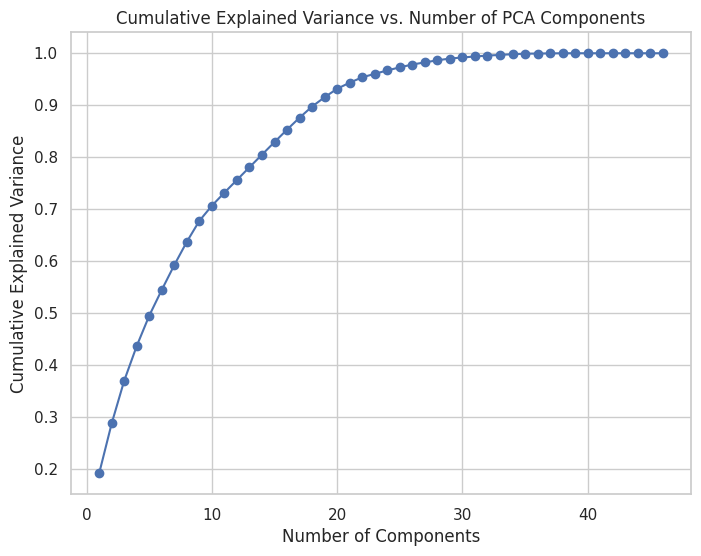

Best number of components to explain 95.0% variance: 22


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = big_df2.drop('attack', axis=1)
y = big_df2['attack']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the desired explained variance threshold
desired_variance_threshold = 0.95

# Perform PCA to find the best number of components
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that meet the desired variance threshold
best_num_components = np.argmax(cumulative_explained_variance >= desired_variance_threshold) + 1

# Plot the explained variance vs. number of components (optional)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, X.shape[1] + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the best number of components
print(f"Best number of components to explain {desired_variance_threshold * 100}% variance: {best_num_components}")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Balancing the dataset using SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

In [ ]:
%%time
accuracy_l1 = apply_regularization(X_train_balanced, X_test_pca, y_train_balanced, y_test, regularization_type='l1', C=1.0)
print("Logistic Regression with L1 regularization", accuracy_l1)

Logistic Regression with L1 regularization 0.9801060725468062
CPU times: user 33.8 s, sys: 260 ms, total: 34 s
Wall time: 34.3 s


In [ ]:
%%time
accuracy_l2 = apply_regularization(X_train_balanced, X_test_pca, y_train_balanced, y_test, regularization_type='l2', C=1.0)
print("Logistic Regression with L2 regularization", accuracy_l2)

Logistic Regression with L2 regularization 0.9801060725468062
CPU times: user 4.99 s, sys: 337 ms, total: 5.33 s
Wall time: 5.4 s


In [ ]:
%%time
model_rf, accuracy_rf = apply_random_forest(X_train_balanced, X_test_pca, y_train_balanced, y_test, n_estimators=100, max_depth=None)
print(f"Accuracy with Random Forest: {accuracy_rf:.4f}")

Accuracy with Random Forest: 0.9878
CPU times: user 7min 19s, sys: 558 ms, total: 7min 20s
Wall time: 7min 21s


In [ ]:
%%time
model_knn, accuracy_knn = apply_knn(X_train_balanced, X_test_pca, y_train_balanced, y_test, n_neighbors=5)
print(f"Accuracy with k-Nearest Neighbors: {accuracy_knn:.4f}")

Accuracy with k-Nearest Neighbors: 0.9868
CPU times: user 2min 51s, sys: 305 ms, total: 2min 51s
Wall time: 1min 47s


In [ ]:
%%time
model_dt, accuracy_dt = apply_decision_tree(X_train_balanced, X_test_pca, y_train_balanced, y_test, max_depth=None)
print(f"Accuracy with Decision Tree: {accuracy_dt:.4f}")

Accuracy with Decision Tree: 0.9875
CPU times: user 48.6 s, sys: 76.7 ms, total: 48.7 s
Wall time: 49.9 s


In [ ]:
%%time
model_nb, accuracy_nb = apply_naive_bayes(X_train_balanced, X_test_pca, y_train_balanced, y_test)
print(f"Accuracy with Naive Bayes: {accuracy_nb:.4f}")

Accuracy with Naive Bayes: 0.9611
CPU times: user 187 ms, sys: 56.8 ms, total: 243 ms
Wall time: 244 ms


## Feature Selection with RF

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# Function to apply L1 or L2 regularization
def apply_regularization(X_train, X_test, y_train, y_test, regularization_type='l2', C=1.0):
    model = LogisticRegression(penalty=regularization_type, C=C, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, class_report, conf_matrix

# Function to apply Random Forest
def apply_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    class_report_rf = classification_report(y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    return model_rf, accuracy_rf, class_report_rf, conf_matrix_rf

# Function to apply k-Nearest Neighbors
def apply_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    class_report_knn = classification_report(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
    return model_knn, accuracy_knn, class_report_knn, conf_matrix_knn

# Function to apply Decision Tree
def apply_decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    class_report_dt = classification_report(y_test, y_pred_dt)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    return model_dt, accuracy_dt, class_report_dt, conf_matrix_dt

# Function to apply Naive Bayes
def apply_naive_bayes(X_train, X_test, y_train, y_test):
    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)
    y_pred_nb = model_nb.predict(X_test)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    class_report_nb = classification_report(y_test, y_pred_nb)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    return model_nb, accuracy_nb, class_report_nb, conf_matrix_nb


In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_

# Select the top 'n' features, let's say top 5 for this example
indices = np.argsort(importances)[-10:]

# Selecting the top features from the training and testing sets
X_train_selected = X_train.iloc[:, indices]
X_test_selected = X_test.iloc[:, indices]

# Balancing the dataset using SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

In [ ]:
%%time
accuracy_l1, class_report_l1, conf_matrix_l1 = apply_regularization(X_train_balanced, X_test_selected, y_train_balanced, y_test, regularization_type='l1', C=1.0)
print("Logistic Regression with L1 regularization")
print(f"Accuracy: {accuracy_l1:.4f}")
print("Classification Report:")
print(class_report_l1)
print("Confusion Matrix:")
print(conf_matrix_l1)

Logistic Regression with L1 regularization
Accuracy: 0.9522
Classification Report:
              precision    recall  f1-score   support

         0.0       0.32      0.90      0.47      1096
         1.0       1.00      0.95      0.98     45853

    accuracy                           0.95     46949
   macro avg       0.66      0.93      0.72     46949
weighted avg       0.98      0.95      0.96     46949

Confusion Matrix:
[[  985   111]
 [ 2131 43722]]
CPU times: user 3.01 s, sys: 208 ms, total: 3.21 s
Wall time: 3.22 s


In [ ]:
%%time
accuracy_l2, class_report_l2, conf_matrix_l2 = apply_regularization(X_train_balanced, X_test_selected, y_train_balanced, y_test, regularization_type='l2', C=1.0)
print("Logistic Regression with L2 regularization")
print(f"Accuracy: {accuracy_l2:.4f}")
print("Classification Report:")
print(class_report_l2)
print("Confusion Matrix:")
print(conf_matrix_l2)

Logistic Regression with L2 regularization
Accuracy: 0.9505
Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.89      0.46      1096
         1.0       1.00      0.95      0.97     45853

    accuracy                           0.95     46949
   macro avg       0.65      0.92      0.72     46949
weighted avg       0.98      0.95      0.96     46949

Confusion Matrix:
[[  980   116]
 [ 2208 43645]]
CPU times: user 2.43 s, sys: 91.4 ms, total: 2.52 s
Wall time: 2.56 s


In [ ]:
%%time
model_rf, accuracy_rf, class_report_rf, conf_matrix_rf = apply_random_forest(X_train_balanced, X_test_selected, y_train_balanced, y_test, n_estimators=100, max_depth=None)
print("Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(class_report_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest
Accuracy: 0.9934
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34108
         1.0       1.00      1.00      1.00      8171
         2.0       1.00      1.00      1.00      2695
         3.0       0.89      0.92      0.90      1096
         4.0       0.81      0.79      0.80       544
         5.0       0.78      0.75      0.76       307
         6.0       0.73      0.41      0.52        27

    accuracy                           0.99     46948
   macro avg       0.89      0.84      0.86     46948
weighted avg       0.99      0.99      0.99     46948

Confusion Matrix:
[[34098     8     1     0     0     1     0]
 [    3  8167     0     0     0     1     0]
 [    0     0  2694     0     1     0     0]
 [    0     0     0  1009    51    34     2]
 [    3     0     1    85   431    23     1]
 [    0     0     0    38    38   230     1]
 [    0     0     0     2     8     6    11]]
CPU times: user

In [ ]:
%%time
model_knn, accuracy_knn, class_report_knn, conf_matrix_knn = apply_knn(X_train_balanced, X_test_selected, y_train_balanced, y_test, n_neighbors=5)
print("k-Nearest Neighbors (KNN)")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(class_report_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

k-Nearest Neighbors (KNN)
Accuracy: 0.9887
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34108
         1.0       1.00      1.00      1.00      8171
         2.0       0.99      1.00      1.00      2695
         3.0       0.87      0.78      0.82      1096
         4.0       0.69      0.74      0.71       544
         5.0       0.63      0.71      0.67       307
         6.0       0.20      0.63      0.31        27

    accuracy                           0.99     46948
   macro avg       0.77      0.84      0.79     46948
weighted avg       0.99      0.99      0.99     46948

Confusion Matrix:
[[34075     3    15     0    10     3     2]
 [    0  8166     3     0     1     1     0]
 [    2     0  2691     1     1     0     0]
 [    0     0     0   851   131    80    34]
 [    1     0     0    87   400    42    14]
 [    0     0     0    40    32   219    16]
 [    0     0     0     4     4     2    17]]
CPU

In [ ]:
%%time
model_dt, accuracy_dt, class_report_dt, conf_matrix_dt = apply_decision_tree(X_train_balanced, X_test_selected, y_train_balanced, y_test, max_depth=None)
print("Decision Tree")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(class_report_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree
Accuracy: 0.9922
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34108
         1.0       1.00      1.00      1.00      8171
         2.0       1.00      1.00      1.00      2695
         3.0       0.89      0.86      0.88      1096
         4.0       0.77      0.79      0.78       544
         5.0       0.72      0.75      0.74       307
         6.0       0.43      0.56      0.48        27

    accuracy                           0.99     46948
   macro avg       0.83      0.85      0.84     46948
weighted avg       0.99      0.99      0.99     46948

Confusion Matrix:
[[34101     1     2     0     3     1     0]
 [    3  8168     0     0     0     0     0]
 [    0     0  2694     0     1     0     0]
 [    0     0     1   945    90    50    10]
 [    0     0     1    76   430    32     5]
 [    0     0     0    38    33   231     5]
 [    0     0     0     3     3     6    15]]
CPU times: user

In [ ]:
%%time
model_nb, accuracy_nb, class_report_nb, conf_matrix_nb = apply_naive_bayes(X_train_balanced, X_test_selected, y_train_balanced, y_test)
print("Naive Bayes")
print(f"Accuracy: {accuracy_nb:.4f}")
print("Classification Report:")
print(class_report_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

Naive Bayes
Accuracy: 0.9817
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.99      0.72      1096
         1.0       1.00      0.98      0.99     45853

    accuracy                           0.98     46949
   macro avg       0.78      0.99      0.85     46949
weighted avg       0.99      0.98      0.98     46949

Confusion Matrix:
[[ 1088     8]
 [  851 45002]]
CPU times: user 257 ms, sys: 4.05 ms, total: 261 ms
Wall time: 263 ms


In [ ]:
examples = X_test_selected.copy()
examples['target'] = y_test
examples

,Number,Protocol Type,Header_Length,Tot sum,Magnitue,flow_duration,AVG,Min,Tot size,IAT,target
186433,9.500000,1.04,1.740000,446.62,9.224982,0.011220,42.559898,42.00,42.34,8.312402e+07,0.0
37143,9.500000,6.00,54.000000,567.00,10.392305,0.000000,54.000000,54.00,54.00,8.308980e+07,0.0
168201,9.500000,1.00,0.000000,441.00,9.165151,0.000000,42.000000,42.00,42.00,8.312477e+07,0.0
20019,9.500000,6.00,54.000000,567.00,10.392305,0.000000,54.000000,54.00,54.00,8.333173e+07,0.0
228963,9.500000,6.00,54.120000,567.24,10.393517,0.000000,54.012316,54.00,54.12,8.295574e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44058,9.500000,1.00,0.000000,441.00,9.165151,0.000000,42.000000,42.00,42.00,8.312889e+07,0.0
18018,9.500000,6.00,54.000000,567.00,10.392305,0.000000,54.000000,54.00,54.00,8.334516e+07,0.0
124445,9.499313,6.00,33322.494369,363.00,11.489125,6.744395,66.000000,66.00,66.00,5.698204e-06,4.0
71654,9.500000,6.11,55.640000,599.80,10.857616,0.000000,59.900293,55.64,55.64,8.334091e+07,0.0


In [ ]:
y_train.value_counts()

0.0    136432
1.0     32683
2.0     10778
3.0      4385
4.0      2177
5.0      1230
6.0       106
Name: target, dtype: int64

In [ ]:
import joblib
joblib.dump(model_rf, "/content/rf_model.sav")

['/content/rf_model.sav']

In [ ]:
idx2str = {0: 'DDoS Attacks',
           1: 'DoS Attacks',
           2: 'Mirai Attacks',
           3: 'Benign Traffic',
           4: 'Other Attacks',
           5: 'Reconnaissance',
           6: 'Malware and Exploits'}

In [ ]:
def make_predict(data):
    clf = joblib.load("/content/rf_model.sav")
    target = clf.predict(data)
    print(int(target))
    return idx2str[int(target)]

In [ ]:
examples.to_csv("/content/examples.csv")

In [ ]:
pt = [[9.5, 1.04, 1.74, 446.62, 9.22, 0.0112, 42.559, 42, 42.34, 83124022]]
make_predict(pt)

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'DDoS Attacks'

In [ ]:
p = [[9.499312945716339, 17.0, 353020.9, 690.3, 13.824572893315883, 16.863517904281615, 101.81555555555556, 50.0, 248.8, 0.000730895996093]]
make_predict(p)

4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Other Attacks'